In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [104]:
data = pd.read_csv('Housing_Prices.csv')
data.head()
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [106]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 15 to 21598
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         2121 non-null   int64  
 1   Date House was Sold                        2121 non-null   object 
 2   Sale Price                                 2121 non-null   float64
 3   No of Bedrooms                             2121 non-null   int64  
 4   No of Bathrooms                            2121 non-null   float64
 5   Flat Area (in Sqft)                        2121 non-null   float64
 6   Lot Area (in Sqft)                         2121 non-null   float64
 7   No of Floors                               2121 non-null   float64
 8   Waterfront View                            2121 non-null   object 
 9   No of Times Visited                        2121 non-null   object 
 10  Condition of the House     

In [107]:
# Select relevant features and target variable
features = ['Flat Area (in Sqft)', 'No of Bedrooms', 'No of Bathrooms']
X = data[features]
y = data['Sale Price']

In [108]:
# Check for missing values
print(X.isnull().sum())

Flat Area (in Sqft)    0
No of Bedrooms         0
No of Bathrooms        0
dtype: int64


In [109]:
# Fill missing values with median (if any)
X = X.fillna(X.median())

In [110]:
# Check again for missing values
print(X.isnull().sum())

Flat Area (in Sqft)    0
No of Bedrooms         0
No of Bathrooms        0
dtype: int64


In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
train_data = X_train.join(y_train)
train_data

,Flat Area (in Sqft),No of Bedrooms,No of Bathrooms,Sale Price
19389,2960.0,3,1.75,936000.0
15516,1560.0,2,1.00,724000.0
7436,3650.0,5,3.00,1310000.0
15692,4660.0,3,3.50,1640000.0
8556,3320.0,4,2.50,1110000.0
...,...,...,...,...
16120,3370.0,5,3.25,1550000.0
10817,5000.0,4,4.00,1690000.0
11225,5300.0,4,2.50,2560000.0
12932,1800.0,2,1.50,850000.0


array([[<Axes: title={'center': 'Flat Area (in Sqft)'}>,
        <Axes: title={'center': 'No of Bedrooms'}>],
       [<Axes: title={'center': 'No of Bathrooms'}>,
        <Axes: title={'center': 'Sale Price'}>]], dtype=object)

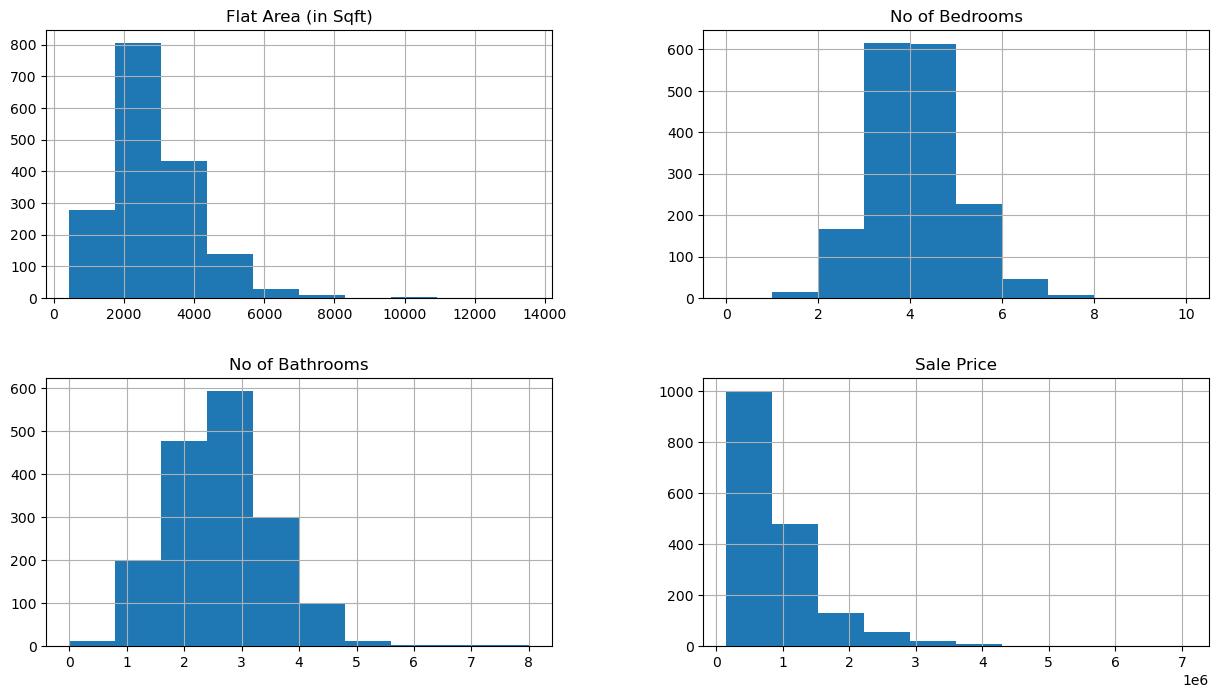

In [113]:
train_data.hist(figsize=(15,8))

<Axes: >

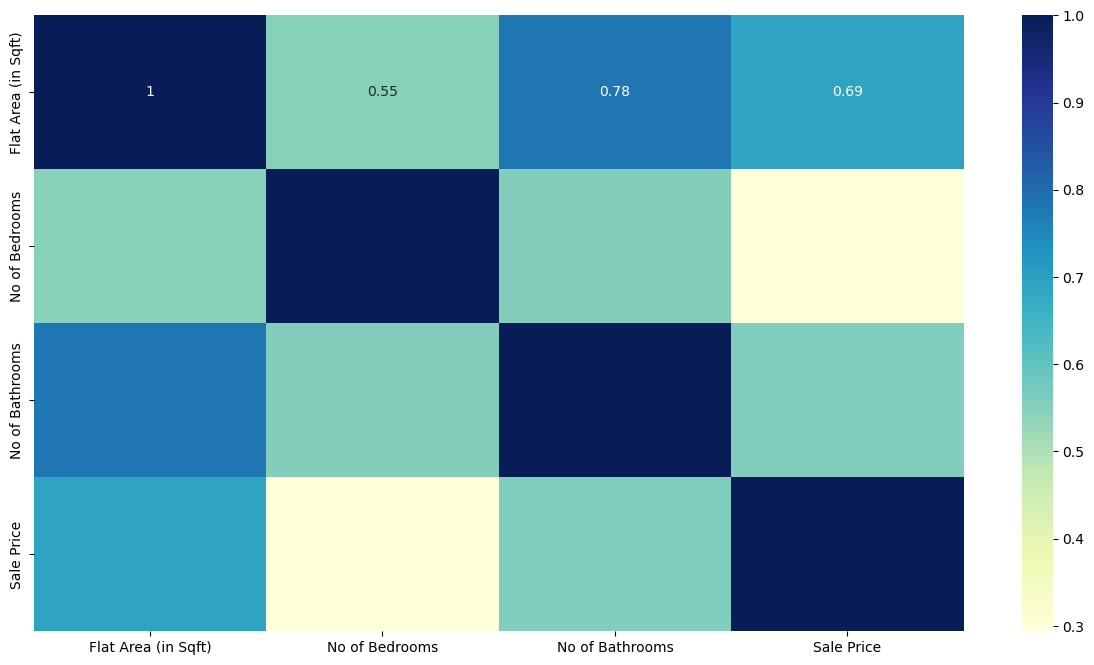

In [114]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap = "YlGnBu")

In [115]:
lm = LinearRegression()

In [116]:
lm.fit(X_train,y_train)

LinearRegression()

In [117]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Flat Area (in Sqft),370.774112
No of Bedrooms,-90098.195643
No of Bathrooms,60797.789668


In [118]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted')

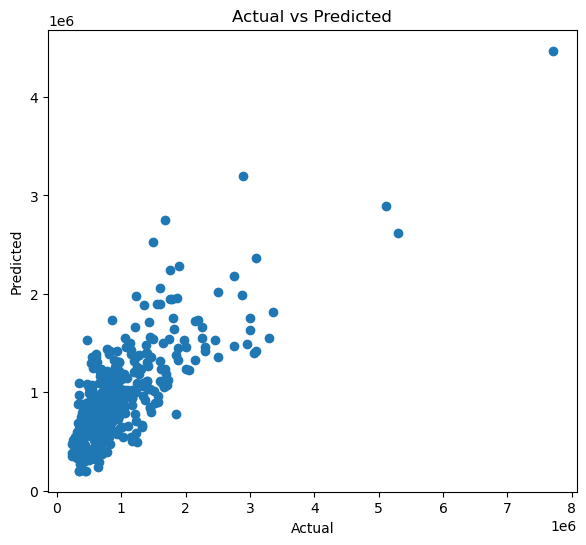

In [119]:
# Plotting
plt.figure(figsize=(15, 6))

# Scatter plot for actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')


C:\Users\itspo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


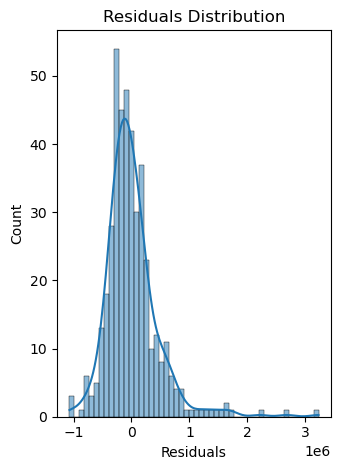

In [120]:
# Distribution plot for residuals
plt.subplot(1, 2, 2)
sns.histplot((y_test - predictions), bins=50, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()